# Bondora Data Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('LoanData.csv',low_memory=False)

## Percentage of Missing Values

In [3]:
pd.set_option('display.max_rows', None)
df_missing = round(df.isnull().sum()/len(df.index), 2)*100
df_missing.sort_values(ascending=False)

City                                      100.0
County                                    100.0
DateOfBirth                               100.0
EmploymentPosition                        100.0
Rating_V0                                  97.0
EL_V0                                      97.0
CreditScoreEsEquifaxRisk                   93.0
EL_V1                                      93.0
Rating_V1                                  93.0
Rating_V2                                  86.0
WorkExperience                             80.0
NrOfDependants                             80.0
GracePeriodStart                           77.0
GracePeriodEnd                             77.0
CreditScoreFiAsiakasTietoRiskGrade         76.0
PlannedPrincipalTillDate                   70.0
PreviousEarlyRepaymentsBefoleLoan          68.0
ReScheduledOn                              65.0
NextPaymentDate                            63.0
EAD2                                       60.0
DefaultDate                             

In [4]:
# removing the columns having more than 50% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 50]
print(missing_columns)

Index(['DateOfBirth', 'County', 'City', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'EL_V0', 'Rating_V0',
       'EL_V1', 'Rating_V1', 'Rating_V2', 'ActiveLateCategory',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')


In [5]:
miss_col=['DateOfBirth', 'County', 'City', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'EL_V0', 'Rating_V0',
       'EL_V1', 'Rating_V1', 'Rating_V2', 'ActiveLateCategory',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost']

In [6]:
loan = df.drop(miss_col, axis=1)
print(loan.shape)

(182017, 78)


## drop meaningless columns

In [7]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [8]:
loan = loan.drop(cols_del,axis=1)

## Creating Target Variable

In [9]:
loan['Status'].value_counts()

Late       67347
Current    61001
Repaid     53669
Name: Status, dtype: int64

In [10]:
# remove Current Status records
loan = loan[loan['Status'] != 'Current']

In [11]:
loan['ActiveLateLastPaymentCategory'].value_counts()

180+       43885
16-30       9372
31-60       6430
1��7��      3696
61-90       3455
91-120      2749
8��15��     2736
121-150     2350
151-180     2259
Name: ActiveLateLastPaymentCategory, dtype: int64

In [12]:
loan["Default0"] = loan['Status'].apply(lambda x: 0 if x=='Repaid' else 1)

In [13]:
loan["Default1"] = loan['ActiveLateLastPaymentCategory'].apply(lambda x: 1 if x == '91-120' or x=='121-150' or x == '151-180' or x=='180+' else 0)

In [14]:
# We define the loan is default if it is not repaid and its overdue by more than 90 days
loan["Default"] = loan['Default0']*loan['Default1']

In [15]:
loan = loan.drop(['Status','Default0','Default1','ActiveLateLastPaymentCategory'],axis=1)

In [16]:
loan.to_csv('Bondora_preprocessed.csv',index=False)

# Feature Selection

In [17]:
import numpy as np # linear algebra
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [18]:
df_original = pd.read_csv('Loandata.csv',low_memory=False)
df=pd.read_csv('Bondora_preprocessed.csv',low_memory=False)

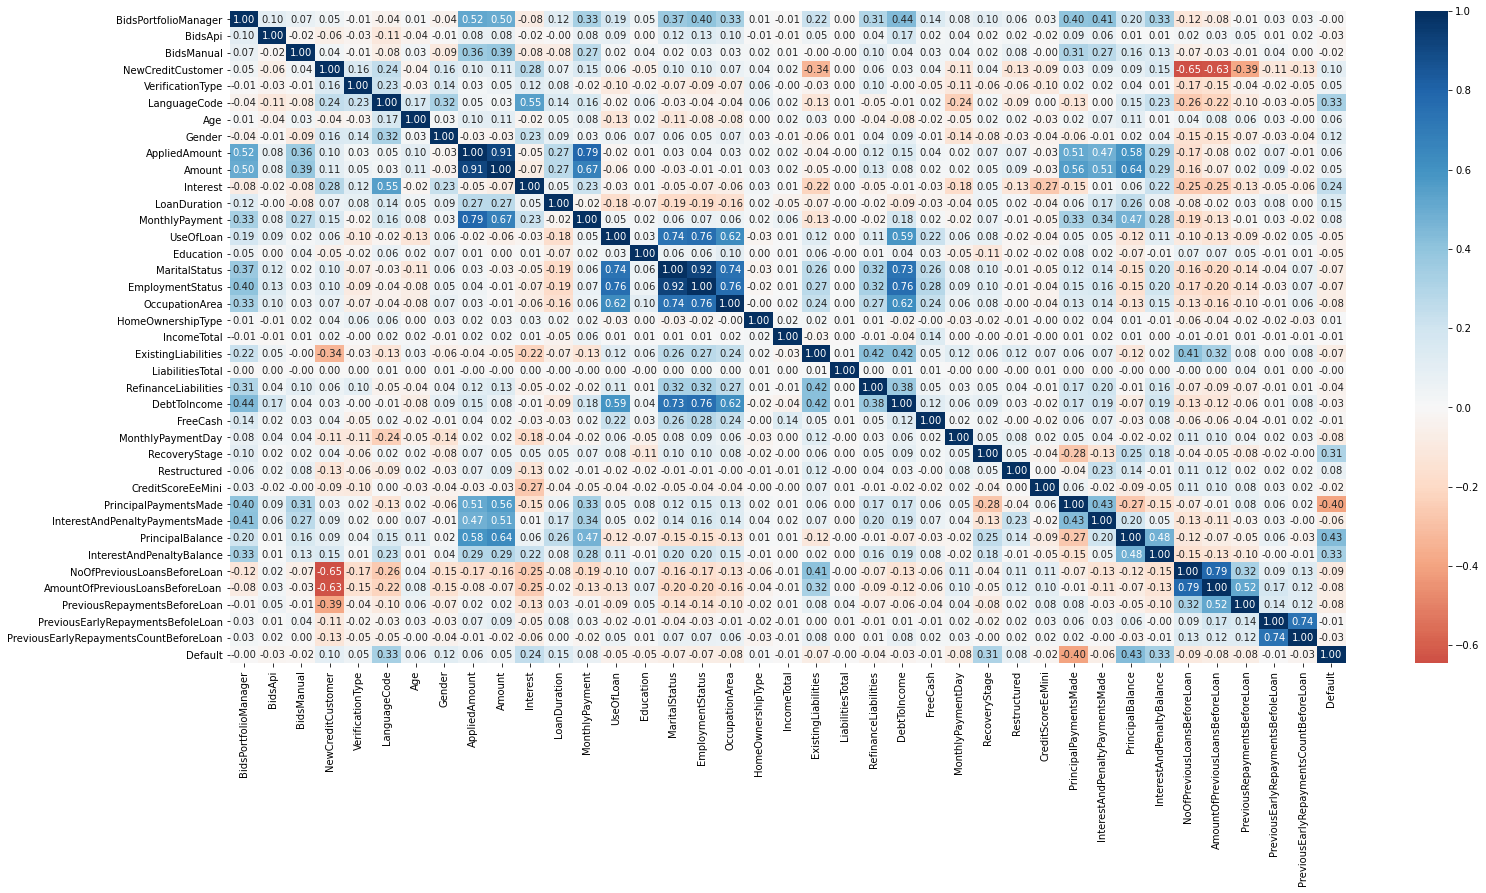

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(25, 12)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax) 

plt.show()

## raw feature list
We picked a list of raw features that may be correlated to our target variables in general means.

In [20]:
raw_features = ["PrincipalBalance",  "Country",
             "InterestAndPenaltyBalance", "Interest", "LoanDuration", "Gender", "NewCreditCustomer",
             "Restructured", "AppliedAmount",
             "Age", "VerificationType",
             "HomeOwnershipType", "LiabilitiesTotal",
             "IncomeTotal","CreditScoreEeMini",
             "Education", "MaritalStatus",
             "EmploymentStatus","Default"]
df = df.loc[:,raw_features]

## DebtToIncomeRatio
Debt to income ratio is more meaningful than both existingliabilities and liabilitiestotal. We will create a new variable DebtToIncomeRatio and drop existingliabilities and liabilitiestotal.

In [21]:
# Round income to nearest Euro
df["IncomeTotal"] = df["IncomeTotal"].round() 
# Ditto for liabilities.
df["LiabilitiesTotal"] = df["LiabilitiesTotal"].round()

# Compute new attribute.
df["DebtToIncomeRatio"] = df["LiabilitiesTotal"]/df["IncomeTotal"]

print(df.DebtToIncomeRatio.describe())
print("Uh oh, the describe() has issues. it's returning infinity and NaN!")

# Digging deeper, we see this results when income is equal to 0.
# Dividing by zero is either NaN or infinite.
bad_ratio_index = df.DebtToIncomeRatio.sort_values(ascending=False).head(25).index
df.loc[bad_ratio_index, ["IncomeTotal", "LiabilitiesTotal", "DebtToIncomeRatio", "Default"]].head(10)

count    1.209760e+05
mean              inf
std               NaN
min      0.000000e+00
25%      4.571429e-02
50%      2.617395e-01
75%      4.985779e-01
max               inf
Name: DebtToIncomeRatio, dtype: float64
Uh oh, the describe() has issues. it's returning infinity and NaN!


,IncomeTotal,LiabilitiesTotal,DebtToIncomeRatio,Default
2076,0.0,2039.0,inf,0
2382,0.0,3295.0,inf,0
2216,0.0,3350.0,inf,0
78402,0.0,1500.0,inf,0
2236,0.0,4847.0,inf,0
3359,0.0,200.0,inf,0
2083,0.0,3485.0,inf,0
3317,0.0,150.0,inf,0
3279,0.0,48.0,inf,0
3246,0.0,166.0,inf,0


When income is equal to 0, let us set the DebtToIncome ratio equal to liabilities. In that situation, the DebtToIncome ratio will be a very high number.

In [22]:
df.loc[df[(df.IncomeTotal == 0)].index, "DebtToIncomeRatio"] = df.loc[df[(df.IncomeTotal == 0)].index, "LiabilitiesTotal"]

df.loc[bad_ratio_index, ["IncomeTotal", "LiabilitiesTotal", "DebtToIncomeRatio", "Default"]].head(10)

,IncomeTotal,LiabilitiesTotal,DebtToIncomeRatio,Default
2076,0.0,2039.0,2039.0,0
2382,0.0,3295.0,3295.0,0
2216,0.0,3350.0,3350.0,0
78402,0.0,1500.0,1500.0,0
2236,0.0,4847.0,4847.0,0
3359,0.0,200.0,200.0,0
2083,0.0,3485.0,3485.0,0
3317,0.0,150.0,150.0,0
3279,0.0,48.0,48.0,0
3246,0.0,166.0,166.0,0


In [23]:
df.drop(columns=["LiabilitiesTotal"], inplace=True)

## VerificationType

In [24]:
# First, replace the numbers with the actual names of the verification status.
verificationDict = {
1.0 : "NotVerified",
2.0 : "VerifiedByPhone",
3.0 : "VerifiedByOtherDocument",
4.0 : "VerifiedByBankStatement"
}
df.drop(index=df[(df.VerificationType == 0.0) | (df.VerificationType.isnull())].index, inplace=True)
df.VerificationType.replace(to_replace=verificationDict, inplace=True)
df.VerificationType = df.VerificationType.astype('category')

df.VerificationType.value_counts()

VerifiedByBankStatement    72869
NotVerified                37289
VerifiedByOtherDocument     8972
VerifiedByPhone             1828
Name: VerificationType, dtype: int64

In [25]:
verification_dis = df.VerificationType.value_counts(normalize=True)
verification_dis.map('{:.2%}'.format)

VerifiedByBankStatement    60.24%
NotVerified                30.83%
VerifiedByOtherDocument     7.42%
VerifiedByPhone             1.51%
Name: VerificationType, dtype: object

In [26]:
tab = pd.crosstab(df.Default, df.VerificationType)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

VerificationType,NotVerified,VerifiedByBankStatement,VerifiedByOtherDocument,VerifiedByPhone
Default,,,,
0,0.676822,0.627784,0.663843,0.874179
1,0.323178,0.372216,0.336157,0.125821


Given the similar proportions in terms of default for each verification type, except for verifiedByPhone, which only makes up a small fraction of the dataset, it is likely safe to remove verification type from our dataset for the sake of reducing the noise that could impact our models.

In [27]:
df.drop(columns="VerificationType", inplace=True)

## Gender

In [28]:
# First, replace the numbers with the actual names of the gender status.
genderDict = {
"col" : "Gender",
"0.0" : "Male",
"1.0" : "Female",
"2.0" : "Unknown"
}
df.Gender = df.Gender.astype('string')
df.Gender.replace(to_replace=genderDict, inplace=True)
df.Gender = df.Gender.astype('category')
df.Gender.value_counts(normalize=True).round(4) * 100

Male       62.13
Female     28.77
Unknown     9.11
Name: Gender, dtype: float64

In [29]:
tab = pd.crosstab(df.Default, df.Gender)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

Gender,Female,Male,Unknown
Default,,,
0,0.713547,0.663934,0.346468
1,0.286453,0.336066,0.653532


Given the similar proportions in terms of default for each gender, except for Unknown, which only makes up a small fraction of the dataset, it is likely safe to remove gender from our dataset for the sake of reducing the noise that could impact our models.

In [30]:
df.drop(columns="Gender", inplace=True)

## Educatoin

In [31]:
educationDict = {
"col": "Education",
"-1.0" : "N/A",
"0.0"  : "N/A",
"1.0"  : "Primary",
"2.0"  : "Basic",
"3.0"  : "Vocational",
"4.0"  : "Secondary",
"5.0"  : "Higher"
}
df.Education = df.Education.astype('string')
df.Education.replace(to_replace=educationDict, inplace=True)
df.Education = df.Education.astype('category')
# Remove all records with N/A or null for education.
df.drop(df[(df.Education == "N/A") | (df.Education.isnull())].index, inplace=True)
df.Education.value_counts(normalize=True).round(4) * 100

Secondary     36.88
Higher        26.27
Vocational    22.56
Primary        9.37
Basic          4.91
N/A            0.00
Name: Education, dtype: float64

In [32]:
tab = pd.crosstab(df.Default, df.Education)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

Education,Basic,Higher,Primary,Secondary,Vocational
Default,,,,,
0,0.650328,0.65194,0.563455,0.682201,0.62594
1,0.349672,0.34806,0.436545,0.317799,0.37406


Given the similar proportions in terms of default for each gender, except for Basic and Primary, which only makes up a small fraction of the dataset, it is likely safe to remove Education from our dataset for the sake of reducing the noise that could impact our models.

In [33]:
df.drop(columns="Education", inplace=True)

## Country

In [34]:
df.Country.value_counts(normalize=True).round(4) * 100

EE    53.66
FI    25.88
ES    20.22
SK     0.24
Name: Country, dtype: float64

In [35]:
tab = pd.crosstab(df.Default, df.Country)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical
#Keep Country

Country,EE,ES,FI,SK
Default,,,,
0,0.782792,0.375911,0.587279,0.345763
1,0.217208,0.624089,0.412721,0.654237


## MaritalStatus

In [36]:
MaritalDict = {
"col": "MaritalStatus",
"-1.0" : "N/A",
"0.0"  : "N/A",
"1.0"  : "Married",
"2.0"  : "Cohabitant",
"3.0"  : "Single",
"4.0"  : "Divorced",
"5.0"  : "Widow"
}
df.MaritalStatus = df.MaritalStatus.astype('string')
df.MaritalStatus.replace(to_replace=MaritalDict, inplace=True)
df.MaritalStatus = df.MaritalStatus.astype('category')
# Remove all records with N/A or null for Marital.
df.drop(df[(df.MaritalStatus == "N/A") | (df.MaritalStatus.isnull())].index, inplace=True)

In [37]:
df.MaritalStatus.value_counts(normalize=True).round(4) * 100

Single        34.31
Married       29.13
Cohabitant    25.61
Divorced       9.34
Widow          1.62
N/A            0.00
Name: MaritalStatus, dtype: float64

In [38]:
tab = pd.crosstab(df.Default, df.MaritalStatus)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical
#drop MaritalStatus

MaritalStatus,Cohabitant,Divorced,Married,Single,Widow
Default,,,,,
0,0.791546,0.656164,0.708068,0.665113,0.70318
1,0.208454,0.343836,0.291932,0.334887,0.29682


In [39]:
df.drop(columns="MaritalStatus", inplace=True)

## Restructured

In [40]:
df.Restructured.value_counts(normalize=True).round(4) * 100

False    73.01
True     26.99
Name: Restructured, dtype: float64

In [41]:
tab = pd.crosstab(df.Default, df.Restructured)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

Restructured,False,True
Default,,
0,0.724478,0.670018
1,0.275522,0.329982


Given the similar proportions in terms of default for each restructured type, it is likely safe to remove Restructured from our dataset for the sake of reducing the noise that could impact our models.

In [42]:
df.drop(columns="Restructured", inplace=True)

## CreditScoreEeMini

In [43]:
df.CreditScoreEeMini.value_counts(normalize=True).round(4) * 100

1000.0    72.67
800.0      9.68
900.0      7.48
600.0      5.47
700.0      4.69
0.0        0.01
Name: CreditScoreEeMini, dtype: float64

In [44]:
tab = pd.crosstab(df.Default, df.CreditScoreEeMini)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

CreditScoreEeMini,0.0,600.0,700.0,800.0,900.0,1000.0
Default,,,,,,
0,1.0,0.786052,0.801653,0.79453,0.791883,0.80825
1,0.0,0.213948,0.198347,0.20547,0.208117,0.19175


In [45]:
#Drop CreditScoreEeMini
df.drop(columns="CreditScoreEeMini", inplace=True)

## EmploymentStatus

In [46]:
employmentDict = {
"col": "EmploymentStatus",
"-1.0" : "N/A",
"0.0"  : "N/A",
"1.0"  : "Unemployed",
"2.0"  : "Partially employed",
"3.0"  : "Fully employed",
"4.0"  : "Self-employed",
"5.0"  : "Entrepreneur",
"6.0"  : "Retiree"
}
df.EmploymentStatus = df.EmploymentStatus.astype('string')
df.EmploymentStatus.replace(to_replace=employmentDict, inplace=True)
df.EmploymentStatus = df.EmploymentStatus.astype('category')
# Remove all records with N/A or null for education.
df.drop(df[(df.EmploymentStatus == "N/A") | (df.EmploymentStatus.isnull())].index, inplace=True)

In [47]:
df.EmploymentStatus.value_counts(normalize=True).round(4) * 100

Fully employed        82.67
Entrepreneur           5.37
Retiree                5.05
Self-employed          3.60
Partially employed     3.31
N/A                    0.00
Name: EmploymentStatus, dtype: float64

In [48]:
tab = pd.crosstab(df.Default, df.EmploymentStatus)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical
# Keep Employment, Drop EmploymentStatus

EmploymentStatus,Entrepreneur,Fully employed,Partially employed,Retiree,Self-employed
Default,,,,,
0,0.760428,0.722649,0.680243,0.581488,0.527534
1,0.239572,0.277351,0.319757,0.418512,0.472466


In [49]:
df["Employment"] = [0 if (i == 'Retiree' or i == 'Self-employed')
                                 else 1 for i in df.EmploymentStatus]

In [50]:
df["Employment"].value_counts(normalize=True)

1    0.913488
0    0.086512
Name: Employment, dtype: float64

In [51]:
df.drop(columns="EmploymentStatus", inplace=True)

we should keep retiree and self-employed since they account for 8.6% of data.

## NewCreditCustomer

In [52]:
df.NewCreditCustomer.value_counts(normalize=True).round(4) * 100

True     68.15
False    31.85
Name: NewCreditCustomer, dtype: float64

In [53]:
tab = pd.crosstab(df.Default, df.NewCreditCustomer)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical
#Keep NewCreditCustomer

NewCreditCustomer,False,True
Default,,
0,0.770999,0.6802
1,0.229001,0.3198


We should keep NewCreditCustomer in our dataset since their default rate varies.

## HomeOwnershipType

In [54]:
HomeOwnerDict = {
"col": "HomeOwnershipType",
"0.0"  : "Homeless",
"1.0"  : "Owner",
"2.0"  : "Living with parents",
"3.0"  : "Tenant-prefurnished",
"4.0"  : "Tenant-unfurnished",
"5.0"  : "Council house",
"6.0"  : "Joint tenant",
"7.0"  : "Joint ownership",
"8.0"  : "Mortgage",
"9.0"  : "Owner with encumbrance",
"10.0"  : "Other",
}
df.HomeOwnershipType = df.HomeOwnershipType.astype('string')
df.HomeOwnershipType.replace(to_replace=HomeOwnerDict, inplace=True)
df.HomeOwnershipType = df.HomeOwnershipType.astype('category')
# Remove all records with N/A or null for education.
df.drop(df[(df.HomeOwnershipType == "N/A") | (df.HomeOwnershipType.isnull())].index, inplace=True)

In [55]:
df.HomeOwnershipType.value_counts(normalize=True).round(4) * 100

Owner                     31.49
Living with parents       18.23
Tenant-prefurnished       16.10
Tenant-unfurnished        10.55
Mortgage                   9.73
Joint ownership            6.96
Joint tenant               3.71
Council house              1.64
Owner with encumbrance     1.48
Homeless                   0.11
Name: HomeOwnershipType, dtype: float64

In [56]:
tab = pd.crosstab(df.Default, df.HomeOwnershipType)
prop_tab_vertical = tab.apply(lambda r: r/r.sum(), axis=0)
prop_tab_vertical

HomeOwnershipType,Council house,Homeless,Joint ownership,Joint tenant,Living with parents,Mortgage,Owner,Owner with encumbrance,Tenant-prefurnished,Tenant-unfurnished
Default,,,,,,,,,,
0,0.669708,0.243243,0.777586,0.716828,0.634704,0.776956,0.742095,0.781818,0.644627,0.629514
1,0.330292,0.756757,0.222414,0.283172,0.365296,0.223044,0.257905,0.218182,0.355373,0.370486


Given the similar proportions in terms of default for each ownership type, except for Homeless, which only makes up a small fraction of the dataset, it is likely safe to remove Homeownershiptype from our dataset for the sake of reducing the noise that could impact our models.

Default is about the same for the entirety of employment duration. However, retirees default much more -- by 10%

In [57]:
#Drop HomeOwnershipType
df.drop(columns="HomeOwnershipType", inplace=True)

## Converting predictors to the right types

In [58]:
df.dtypes

PrincipalBalance             float64
Country                       object
InterestAndPenaltyBalance    float64
Interest                     float64
LoanDuration                   int64
NewCreditCustomer               bool
AppliedAmount                float64
Age                            int64
IncomeTotal                  float64
Default                        int64
DebtToIncomeRatio            float64
Employment                     int64
dtype: object

In [59]:
typedict = {
"IncomeTotal" : "int64",
"NewCreditCustomer" : "category", # binary
"Age" : "int64",
"Country" : "string",
"AppliedAmount" : "float64",
"Interest" : "float64",
"LoanDuration" : "int64",
"PrincipalBalance" : "float64",
"Employment" : "category",      #binary
"Default" : "category",         # binary
"DebtToIncomeRatio" : "float64"
}

df = df.astype(typedict)

In [60]:
#Convert the categories that are numbers into their equivalent values.
# Commented this out because we removed verificationType.

countryDict = {
"col": "Country",
"EE" : "Estonia",
"FI" : "Finland",
"ES" : "Spain",
"SK" : "Slovakia"
}


#category_dicts = [genderDict, countryDict]#, educationDict]
category_dicts = [countryDict]

for cat in category_dicts:
    df[cat["col"]].replace(cat, inplace=True)

In [61]:
# replace string with category
for col in df.select_dtypes(include=["object", "string"]):
    df[col] = df[col].astype('category')
df.dtypes

PrincipalBalance              float64
Country                      category
InterestAndPenaltyBalance     float64
Interest                      float64
LoanDuration                    int64
NewCreditCustomer            category
AppliedAmount                 float64
Age                             int64
IncomeTotal                     int64
Default                      category
DebtToIncomeRatio             float64
Employment                   category
dtype: object

## Choosing Predictors for Dataset

In [62]:
print(f"Out of the original {df_original.shape[1]} variables,{df.shape[1]} made the final cut.\n These are:")

df_chosen = df
print(df_chosen.dtypes)
print(df_chosen.shape)

Out of the original 112 variables,12 made the final cut.
 These are:
PrincipalBalance              float64
Country                      category
InterestAndPenaltyBalance     float64
Interest                      float64
LoanDuration                    int64
NewCreditCustomer            category
AppliedAmount                 float64
Age                             int64
IncomeTotal                     int64
Default                      category
DebtToIncomeRatio             float64
Employment                   category
dtype: object
(33348, 12)


## Normalizing Numericals
Since we plan to use KNN, we'll need a normalized rendition of the numerical variables.

In [63]:
numerical_features = df.select_dtypes(exclude='category').dtypes

print(numerical_features)
print(f"\nThere are {numerical_features.shape[0]} numerical variables here.")

scaler = preprocessing.StandardScaler()

normalized_numericals = pd.DataFrame(scaler.fit_transform(df[numerical_features.index]),
                                    index=df[numerical_features.index].index,
                                    columns=df[numerical_features.index].columns)

df = pd.concat([df, normalized_numericals.add_prefix("norm_")], axis=1)

PrincipalBalance             float64
InterestAndPenaltyBalance    float64
Interest                     float64
LoanDuration                   int64
AppliedAmount                float64
Age                            int64
IncomeTotal                    int64
DebtToIncomeRatio            float64
dtype: object

There are 8 numerical variables here.


## Converting Categoricals to Dummies
Since we plan to use KNN, SVM, and CART, we need to create dummy variants of the categoricals.

In the cases where predictors only have 2 categories (NewCreditCustomer, Employment and Default), we drop a dummy. One variable is all we need to inform us about all the possible categories for that predictor. Note that gender is excluded due to the availability of an 'other' option.

In [64]:
cat_features = df.select_dtypes(include='category').dtypes

In [65]:
cat_features

Country              category
NewCreditCustomer    category
Default              category
Employment           category
dtype: object

In [66]:
df = df.astype({"Default":"uint8",
                "NewCreditCustomer":"uint8",
                "Employment":"uint8",
                })

In [67]:
#update the remaining category predictor list
cat_features = df.select_dtypes(include='category').dtypes
print(cat_features)

df = pd.concat([df, pd.get_dummies(df[cat_features.index]).add_prefix("gd_")], axis=1)

Country    category
dtype: object


## Converting Numericals to Categorical Bins
Since we're using Naive Bayes, which requires all categorical variables, we need to bin our numerical values.

we will use pandas functions that can do the binning for us.

Since LoanDuration is limited in range, we'll address them differently.

In [68]:
numerical_features

PrincipalBalance             float64
InterestAndPenaltyBalance    float64
Interest                     float64
LoanDuration                   int64
AppliedAmount                float64
Age                            int64
IncomeTotal                    int64
DebtToIncomeRatio            float64
dtype: object

IncomeTotal, Age, AppliedAmount, Interest, DebtToIncomeRatio

For these numerical values we'll split them into 4 bins. qcut will return a bin each containing 25% of the data.

In [69]:
for feature in numerical_features.drop(["LoanDuration"]).index:
    print(pd.qcut(df[feature], q=4, duplicates='drop').value_counts())
    df['bin_' + feature] = pd.qcut(df[feature], q=4, duplicates='drop')

(-11.811, 0.0]        19566
(1223.75, 10630.0]     8337
(0.0, 1223.75]         5445
Name: PrincipalBalance, dtype: int64
(-2.661, 0.0]           19431
(2733.792, 78982.07]     8337
(0.0, 2733.792]          5580
Name: InterestAndPenaltyBalance, dtype: int64
(29.57, 35.33]     8345
(4.999, 22.78]     8343
(22.78, 29.57]     8335
(35.33, 263.63]    8325
Name: Interest, dtype: int64
(63.911, 1060.0]     8884
(3900.0, 10630.0]    8319
(2125.0, 3900.0]     8103
(1060.0, 2125.0]     8042
Name: AppliedAmount, dtype: int64
(17.999, 29.0]    9204
(36.0, 46.0]      8586
(46.0, 75.0]      7868
(29.0, 36.0]      7690
Name: Age, dtype: int64
(1141.0, 1700.0]      8399
(-0.001, 797.0]       8345
(797.0, 1141.0]       8340
(1700.0, 228550.0]    8264
Name: IncomeTotal, dtype: int64
(0.556, 0.76]      8338
(-0.001, 0.397]    8337
(0.397, 0.556]     8337
(0.76, 10.038]     8336
Name: DebtToIncomeRatio, dtype: int64


## LoanDuration
Loans range between 1 and 60 months. We can create bins representing 12-month intervals.

In [70]:
loan_bin = pd.cut(df.LoanDuration, bins=np.linspace(0, 60, 6))

print(loan_bin.value_counts())

df['bin_LoanDuration'] = loan_bin

(48.0, 60.0]    14290
(24.0, 36.0]     7667
(12.0, 24.0]     4473
(0.0, 12.0]      3927
(36.0, 48.0]     2991
Name: LoanDuration, dtype: int64


## Converting the Bins into Binary Categoricals

In [71]:
bins = [col for col in df.columns if 'bin_' in col]
df = pd.concat([df, pd.get_dummies(df[bins]).add_prefix("gd_")], axis=1)

In [72]:
print(df.dtypes.shape)

for i, d in enumerate(df.dtypes.to_dict()):
    print(f'{i}: {d}')

(63,)
0: PrincipalBalance
1: Country
2: InterestAndPenaltyBalance
3: Interest
4: LoanDuration
5: NewCreditCustomer
6: AppliedAmount
7: Age
8: IncomeTotal
9: Default
10: DebtToIncomeRatio
11: Employment
12: norm_PrincipalBalance
13: norm_InterestAndPenaltyBalance
14: norm_Interest
15: norm_LoanDuration
16: norm_AppliedAmount
17: norm_Age
18: norm_IncomeTotal
19: norm_DebtToIncomeRatio
20: gd_Country_Estonia
21: gd_Country_Finland
22: gd_Country_Slovakia
23: gd_Country_Spain
24: bin_PrincipalBalance
25: bin_InterestAndPenaltyBalance
26: bin_Interest
27: bin_AppliedAmount
28: bin_Age
29: bin_IncomeTotal
30: bin_DebtToIncomeRatio
31: bin_LoanDuration
32: gd_bin_PrincipalBalance_(-11.811, 0.0]
33: gd_bin_PrincipalBalance_(0.0, 1223.75]
34: gd_bin_PrincipalBalance_(1223.75, 10630.0]
35: gd_bin_InterestAndPenaltyBalance_(-2.661, 0.0]
36: gd_bin_InterestAndPenaltyBalance_(0.0, 2733.792]
37: gd_bin_InterestAndPenaltyBalance_(2733.792, 78982.07]
38: gd_bin_Interest_(4.999, 22.78]
39: gd_bin_Inte

In [ ]:
df.to_csv("Bondora_cleaned_data.csv")

# Model Building

In [2]:
import numpy as np # linear algebra
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

## Model Datadets - Preparation

In [3]:
df1 = pd.read_csv("LoanData.csv",low_memory=False)

In [4]:
df1.dropna(subset=['ActiveLateLastPaymentCategory'],inplace= True)

In [5]:
df = pd.read_csv("Bondora_cleaned_data.csv",low_memory=False)

In [6]:
# Remove rows with ActiveLateLastPaymentCategory is null
df2 = pd.merge(df,df1,how = 'inner',left_index=True,right_index=True)
df2_col = df2.columns
df = df2[df2_col]

In [7]:
df.ActiveLateLastPaymentCategory.isnull().sum()

0

In [8]:
df = df.iloc[:,:63]

In [9]:
df.dtypes

PrincipalBalance_x                  float64
Country_x                            object
InterestAndPenaltyBalance_x         float64
Interest_x                          float64
LoanDuration_x                        int64
                                     ...   
gd_bin_LoanDuration_(0.0, 12.0]       int64
gd_bin_LoanDuration_(12.0, 24.0]      int64
gd_bin_LoanDuration_(24.0, 36.0]      int64
gd_bin_LoanDuration_(36.0, 48.0]      int64
gd_bin_LoanDuration_(48.0, 60.0]      int64
Length: 63, dtype: object

## SVM

In [10]:
binary_categoricals = ["Default", "NewCreditCustomer_x", "Employment"]

In [11]:
svm_cols = [col for col in df.columns if 'norm_' in col or ('gd_' in col and 'bin_' not in col)]
svm_cols.extend(binary_categoricals)
svm_df = df[svm_cols]

In [12]:
df.columns

Index(['PrincipalBalance_x', 'Country_x', 'InterestAndPenaltyBalance_x',
       'Interest_x', 'LoanDuration_x', 'NewCreditCustomer_x',
       'AppliedAmount_x', 'Age_x', 'IncomeTotal_x', 'Default',
       'DebtToIncomeRatio', 'Employment', 'norm_PrincipalBalance',
       'norm_InterestAndPenaltyBalance', 'norm_Interest', 'norm_LoanDuration',
       'norm_AppliedAmount', 'norm_Age', 'norm_IncomeTotal',
       'norm_DebtToIncomeRatio', 'gd_Country_Estonia', 'gd_Country_Finland',
       'gd_Country_Slovakia', 'gd_Country_Spain', 'bin_PrincipalBalance',
       'bin_InterestAndPenaltyBalance', 'bin_Interest', 'bin_AppliedAmount',
       'bin_Age', 'bin_IncomeTotal', 'bin_DebtToIncomeRatio',
       'bin_LoanDuration', 'gd_bin_PrincipalBalance_(-11.811, 0.0]',
       'gd_bin_PrincipalBalance_(0.0, 1223.75]',
       'gd_bin_PrincipalBalance_(1223.75, 10630.0]',
       'gd_bin_InterestAndPenaltyBalance_(-2.661, 0.0]',
       'gd_bin_InterestAndPenaltyBalance_(0.0, 2733.792]',
       'gd_bin_Int

In [13]:
svm_cols = [col for col in df.columns if 'norm_' in col or 'gd_' in col and 'bin_' not in col]
svm_cols

['norm_PrincipalBalance',
 'norm_InterestAndPenaltyBalance',
 'norm_Interest',
 'norm_LoanDuration',
 'norm_AppliedAmount',
 'norm_Age',
 'norm_IncomeTotal',
 'norm_DebtToIncomeRatio',
 'gd_Country_Estonia',
 'gd_Country_Finland',
 'gd_Country_Slovakia',
 'gd_Country_Spain']

In [14]:
for i,j in enumerate(svm_df):
    print(i," ",j)

0   norm_PrincipalBalance
1   norm_InterestAndPenaltyBalance
2   norm_Interest
3   norm_LoanDuration
4   norm_AppliedAmount
5   norm_Age
6   norm_IncomeTotal
7   norm_DebtToIncomeRatio
8   gd_Country_Estonia
9   gd_Country_Finland
10   gd_Country_Slovakia
11   gd_Country_Spain
12   Default
13   NewCreditCustomer_x
14   Employment


In [15]:
svm_df.shape

(17227, 15)

## KNN

In [16]:
binary_categoricals = ["Default", "NewCreditCustomer_x", "Employment"]

Required variables: Normalized Variables, Dummy Categoricals

In [17]:
knn_cols = [col for col in df.columns if 'norm_' in col or ('gd_' in col and 'bin_' not in col)]
knn_cols.extend(binary_categoricals)
knn_df = df[knn_cols]

In [18]:
for i,j in enumerate(knn_df):
    print(i," ",j)

0   norm_PrincipalBalance
1   norm_InterestAndPenaltyBalance
2   norm_Interest
3   norm_LoanDuration
4   norm_AppliedAmount
5   norm_Age
6   norm_IncomeTotal
7   norm_DebtToIncomeRatio
8   gd_Country_Estonia
9   gd_Country_Finland
10   gd_Country_Slovakia
11   gd_Country_Spain
12   Default
13   NewCreditCustomer_x
14   Employment


In [104]:
knn_df.shape

(17227, 3)

## CART

Required Variables:
Dummy categoricals; non-normalized/non-binned numericals

In [21]:
df_no_cat_columns = df.select_dtypes(exclude='category').dtypes.index
df_no_cat_columns

Index(['PrincipalBalance_x', 'Country_x', 'InterestAndPenaltyBalance_x',
       'Interest_x', 'LoanDuration_x', 'NewCreditCustomer_x',
       'AppliedAmount_x', 'Age_x', 'IncomeTotal_x', 'Default',
       'DebtToIncomeRatio', 'Employment', 'norm_PrincipalBalance',
       'norm_InterestAndPenaltyBalance', 'norm_Interest', 'norm_LoanDuration',
       'norm_AppliedAmount', 'norm_Age', 'norm_IncomeTotal',
       'norm_DebtToIncomeRatio', 'gd_Country_Estonia', 'gd_Country_Finland',
       'gd_Country_Slovakia', 'gd_Country_Spain', 'bin_PrincipalBalance',
       'bin_InterestAndPenaltyBalance', 'bin_Interest', 'bin_AppliedAmount',
       'bin_Age', 'bin_IncomeTotal', 'bin_DebtToIncomeRatio',
       'bin_LoanDuration', 'gd_bin_PrincipalBalance_(-11.811, 0.0]',
       'gd_bin_PrincipalBalance_(0.0, 1223.75]',
       'gd_bin_PrincipalBalance_(1223.75, 10630.0]',
       'gd_bin_InterestAndPenaltyBalance_(-2.661, 0.0]',
       'gd_bin_InterestAndPenaltyBalance_(0.0, 2733.792]',
       'gd_bin_Int

In [23]:
cart_cols = [col for col in df_no_cat_columns if ('norm_' not in col) and 'bin' not in col]
cart_cols

['PrincipalBalance_x',
 'Country_x',
 'InterestAndPenaltyBalance_x',
 'Interest_x',
 'LoanDuration_x',
 'NewCreditCustomer_x',
 'AppliedAmount_x',
 'Age_x',
 'IncomeTotal_x',
 'Default',
 'DebtToIncomeRatio',
 'Employment',
 'gd_Country_Estonia',
 'gd_Country_Finland',
 'gd_Country_Slovakia',
 'gd_Country_Spain']

In [24]:
cart_df = df[cart_cols]

In [25]:
for i,j in enumerate(cart_df):
    print(i," ",j)

0   PrincipalBalance_x
1   Country_x
2   InterestAndPenaltyBalance_x
3   Interest_x
4   LoanDuration_x
5   NewCreditCustomer_x
6   AppliedAmount_x
7   Age_x
8   IncomeTotal_x
9   Default
10   DebtToIncomeRatio
11   Employment
12   gd_Country_Estonia
13   gd_Country_Finland
14   gd_Country_Slovakia
15   gd_Country_Spain


In [26]:
cart_df.shape

(17227, 16)

## Model Running

In [27]:
# Imports.
from sklearn.tree import DecisionTreeClassifier # The model 
from sklearn.metrics import accuracy_score # Metrics
from sklearn.metrics import confusion_matrix # Metrics
from sklearn.metrics import classification_report
from sklearn import metrics
from dmba import plotDecisionTree, classificationSummary 
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, cross_val_score,
cross_val_predict, GridSearchCV, RandomizedSearchCV) # for splitting and avoiding overfitting on model

from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import datetime as dt
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [28]:
df.Default.value_counts(normalize=True).round(3) * 100

0    68.1
1    31.9
Name: Default, dtype: float64

## SVM

In [29]:
svm_df.dtypes

norm_PrincipalBalance             float64
norm_InterestAndPenaltyBalance    float64
norm_Interest                     float64
norm_LoanDuration                 float64
norm_AppliedAmount                float64
norm_Age                          float64
norm_IncomeTotal                  float64
norm_DebtToIncomeRatio            float64
gd_Country_Estonia                  int64
gd_Country_Finland                  int64
gd_Country_Slovakia                 int64
gd_Country_Spain                    int64
Default                             int64
NewCreditCustomer_x                 int64
Employment                          int64
dtype: object

In [30]:
svm_x = knn_df.drop(columns='Default')
svm_y = knn_df.Default

In [32]:
svm_x

,norm_PrincipalBalance,norm_InterestAndPenaltyBalance,norm_Interest,norm_LoanDuration,norm_AppliedAmount,norm_Age,norm_IncomeTotal,norm_DebtToIncomeRatio,gd_Country_Estonia,gd_Country_Finland,gd_Country_Slovakia,gd_Country_Spain,NewCreditCustomer_x,Employment
0,0.198614,-0.357822,-0.546364,0.972352,-0.342973,1.315305,-0.482560,2.109339,1,0,0,0,0,0
1,1.033725,-0.038367,-0.693687,0.972352,0.007296,1.051631,-0.235042,0.550543,1,0,0,0,0,1
2,-0.555156,-0.434278,-0.825703,0.972352,3.061636,0.524283,-0.099043,0.371002,1,0,0,0,1,1
3,0.119985,0.054338,0.197136,0.972352,-0.593164,0.348500,-0.251816,-0.612928,0,0,0,1,1,1
4,0.155670,0.293716,1.268189,0.309129,-0.555135,-0.354630,-0.327068,2.048883,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33337,-0.555156,-0.434278,-0.521492,-0.354095,0.807909,0.787957,0.716950,-0.513846,1,0,0,0,1,1
33340,-0.555156,-0.434278,-0.688712,0.972352,0.007296,2.018435,0.431806,-0.411257,0,1,0,0,1,1
33343,0.749124,0.298519,-0.055800,0.972352,-0.393011,-0.003065,0.399619,-0.739072,0,1,0,0,1,1
33346,-0.555156,-0.434278,-0.521492,0.972352,0.007296,1.754761,-0.484374,1.137440,1,0,0,0,1,1


In [31]:
svm_train_x, svm_test_x, svm_train_y,svm_test_y = train_test_split(svm_x,svm_y, test_size = 0.3, random_state=1)

In [33]:
#tuning parameters - GridSearch
#SVM with grid search(C values: 0.1,1,10; gamma values: "auto","scale", kernel: "poly",'linear','rbf')
svm_param_grid = {'C': [0.1, 1, 10],
                  'gamma': ["auto","scale"],
                  'kernel': ['poly','linear','rbf']}

svm_grid = GridSearchCV(estimator=SVC(probability=True),
                        param_grid=svm_param_grid,
                        refit=True,
                        verbose=2)

svm_grid.fit(svm_train_x, svm_train_y)

print('Best Score:', svm_grid.best_score_)
print('Best Parameter:', svm_grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   8.9s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   8.8s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   8.8s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   8.7s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   8.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.3s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  10.1s
[CV] END ......................C=0.1, gamma=auto

In [118]:
svm_matrix =  metrics.confusion_matrix(svm_test_y, pred_y)

Text(0.5, 257.44, 'Predicted default')

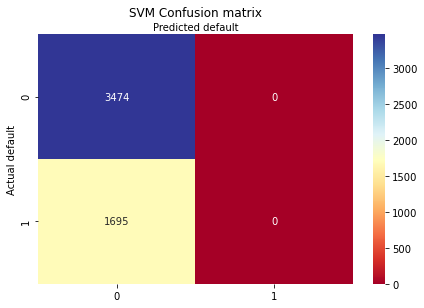

In [128]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(svm_matrix), annot=True, cmap="RdYlBu" ,fmt='g') #heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM Confusion matrix', y=1.1)
plt.ylabel('Actual default')
plt.xlabel('Predicted default')

In [129]:
print("Accuracy:",metrics.accuracy_score(svm_test_y, pred_y))
print("Precision:",metrics.precision_score(svm_test_y, pred_y))
print("Recall:",metrics.recall_score(svm_test_y, pred_y))

Accuracy: 0.6720835751596054
Precision: 0.0
Recall: 0.0


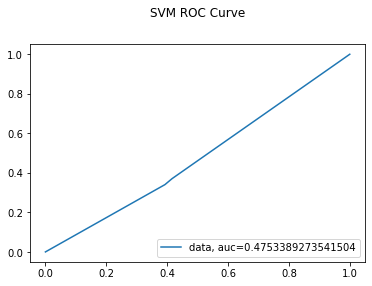

In [130]:
#ROC Curve
y_pred_proba = optimizedSVM.predict_proba(svm_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(svm_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(svm_test_y, y_pred_proba)
plt.title('SVM ROC Curve', y=1.1)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## KNN

In [ ]:
knn_df.dtypes

In [ ]:
knn_x = knn_df.drop(columns='Default')
knn_y = knn_df.Default

In [ ]:
knn_train_x, knn_test_x, knn_train_y,knn_test_y = train_test_split(knn_x,knn_y, test_size = 0.3, random_state=1)

In [ ]:
estimator=KNeighborsClassifier()
estimator.get_params().keys()

In [ ]:
#tuning parameters - GridSearch
knn_param_grid = {
    'n_neighbors':np.arange(1,15,1)
}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid = knn_param_grid,
                     cv=5,
                     n_jobs=-1)
knn_grid.fit(knn_train_x,knn_train_y)
print('Best Score:', knn_grid.best_score_)
print('Best Parameter:', knn_grid.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(knn_train_x, knn_train_y)

In [ ]:
#training model result
pred_y = knn.predict(knn_train_x)
print(classificationSummary(knn_train_y,pred_y))
print(classification_report(knn_train_y,pred_y))

In [ ]:
#testing model result
pred_y = knn.predict(knn_test_x)
print(classificationSummary(knn_test_y,pred_y))
print(classification_report(knn_test_y,pred_y))

In [ ]:
knn_matrix =  metrics.confusion_matrix(knn_test_y, pred_y)

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="RdYlBu" ,fmt='g') #heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual default')
plt.xlabel('Predicted default')

In [ ]:
print("Accuracy:",metrics.accuracy_score(knn_test_y, pred_y))
print("Precision:",metrics.precision_score(knn_test_y, pred_y))
print("Recall:",metrics.recall_score(knn_test_y, pred_y))

In [ ]:
#ROC Curve
y_pred_proba = knn.predict_proba(knn_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(knn_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(knn_test_y, y_pred_proba)
plt.title('KNN ROC Curve', y=1.1)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest

In [ ]:
cart_df.dtypes

In [ ]:
cart_df = cart_df.drop(columns='Country_x')

In [ ]:
rfc_x=cart_df.drop(columns='Default')
rfc_y=cart_df.Default

In [ ]:
rfc_train_x, rfc_test_x, rfc_train_y, rfc_test_y = train_test_split(rfc_x, rfc_y, test_size=0.3, random_state=1)

In [ ]:
#parameters preparation
n_estimators = np.arange(200,400,20)
max_features =['auto','sqrt']
max_depth = np.arange(0,20,5)
min_samples_split = np.arange(10,15,1)
min_samples_leaf = np.arange(4)
bootstrap = [True,False]
criterion = ['entropy', 'gini']

rfc_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
#tuning parameters
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid = rfc_param_grid,
                     cv=5, verbose = 2,
                     n_jobs=-1)
rfc_grid.fit(rfc_train_x,rfc_train_y)
print('Best Score:', rfc_grid.best_score_)
print('Best Parameter:', rfc_grid.best_params_)

In [ ]:
rfc = RandomForestClassifier(n_estimators=280,
                            min_samples_split=10,
                            min_samples_leaf=3,
                            max_features='sqrt',
                            max_depth=15,
                            bootstrap=True)
rfc = rfc.fit(rfc_train_x,rfc_train_y)

In [ ]:
#training model result
pred_y = rfc.predict(rfc_train_x)
print(classificationSummary(rfc_train_y,pred_y))
print(classification_report(rfc_train_y,pred_y))

In [ ]:
#testing model resut
pred_y = rfc.predict(rfc_test_x)
print(classificationSummary(rfc_test_y,pred_y))
print(classification_report(rfc_test_y,pred_y))

In [ ]:
rfc_matrix =  metrics.confusion_matrix(rfc_test_y, pred_y)

In [ ]:
#Confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(rfc_matrix), annot=True, cmap="RdYlBu" ,fmt='g') #heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual default')
plt.xlabel('Predicted default')

In [ ]:
print("Accuracy:",metrics.accuracy_score(rfc_test_y, pred_y))
print("Precision:",metrics.precision_score(rfc_test_y, pred_y))
print("Recall:",metrics.recall_score(rfc_test_y, pred_y))

In [ ]:
#ROC Curve
y_pred_proba = rfc.predict_proba(rfc_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(rfc_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(rfc_test_y, y_pred_proba)
plt.title('RFC ROC Curve', y=1.1)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest's ROC curve is great in identifiying the true positives with a rate of 96.83%.

In [ ]:
# rfc model predicted default
rfc_test_x['default'] = pred_y

In [ ]:
# real default
rfc_test_x['Default'] = rfc_test_y

In [ ]:
#get more information of the test datasets(including previously dropped columns) 
output_df = pd.merge(rfc_test_x,df1,how = 'inner',left_index=True,right_index=True)

In [ ]:
output_df.to_csv('output_df2.csv')

# Strategy Comparison

## Strategy 1

In [ ]:
output = output_df[['ExpectedReturn','default']]

In [ ]:
output['undefault']=output['default'].apply(lambda x: 1 if x==0 else 0)

In [ ]:
output['mixed_return'] = output_df['ExpectedReturn'] * output['undefault']

In [ ]:
#average return of all loans in the test datasets
np.mean(output['mixed_return'])

In [ ]:
output1 = output[output.default==0]

In [ ]:
#average return of all predicted undefault loans in the test datasets
np.mean(output1['mixed_return'])

## Strategy 2

In [ ]:
import numpy as np # linear algebra
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('output_df2.csv')

In [ ]:
df.dropna(subset=['ActiveLateLastPaymentCategory'],inplace= True)

In [ ]:
df.Rating.value_counts()

In [ ]:
# Since there are not many loans under 'AA' category, we will merge 'A' and 'AA' together.
df['Rating'] = df.Rating.apply(lambda x: 'A or above' if x in ('A','AA') else x)

In [ ]:
df.Rating.value_counts()

In [ ]:
#our strategy - only pick predicted undefault loans 
df3 = df[df.default==0]

In [ ]:
t = 0
for i in range(500):
    #Bondora's strategy
    df2 = df.groupby('Rating', group_keys=False).apply(lambda x: x.sample(10))
    df2['UnDefaulted'] = df2.Default.apply(lambda x:0 if x==1 else 1 )
    df2['mixed_return'] = df2['ExpectedReturn'] * df2['UnDefaulted']
    bondora_return = np.mean(df2['mixed_return'])
    
    #our strategy
    df4 = df3.groupby('Rating', group_keys=False).apply(lambda x: x.sample(10))
    df4['UnDefaulted'] = df4.Default.apply(lambda x:0 if x==1 else 1 )
    df4['mixed_return'] = df4['ExpectedReturn'] * df4['UnDefaulted']
    our_return = np.mean(df4['mixed_return'])
    #calculate how many times our strategy beat Bondora's
    if bondora_return<our_return:
        t += 1
# Shows #times our strategy beat Bondora's
print(t)